## Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [5]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [7]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

### sales_of_company_x

Text(0.5, 1.0, 'Original')

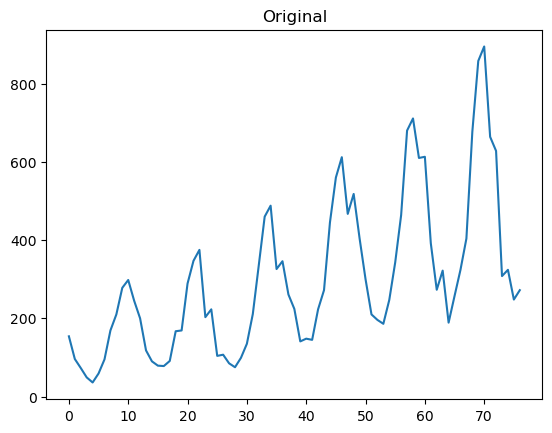

In [76]:
series = sales_of_company_x.Count

series.plot()
plt.title("Original")

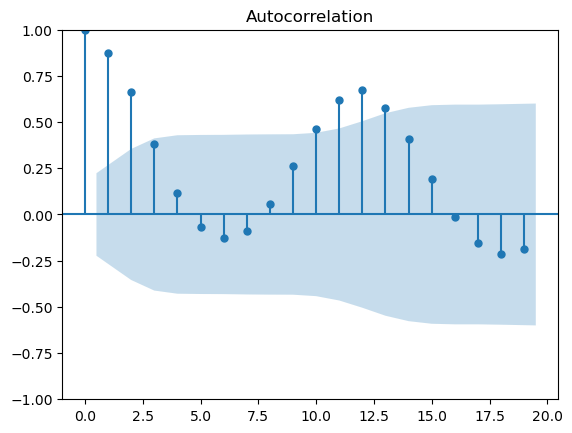

In [77]:
smt.graphics.plot_acf(series, alpha=0.05)
plt.show()

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


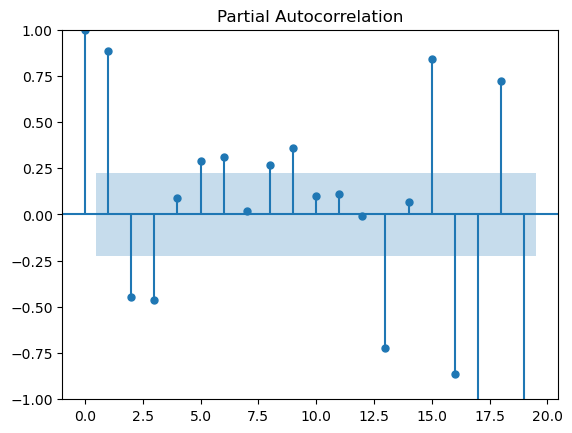

In [78]:
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()

In [79]:
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
dtype: float64

## Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда

In [80]:
series = boxcox(series, 0) #cтабилизируем дисперсию
series = series[12:] - series[:-12] #убираем сезонность
series = series[1:] - series[:-1]
series = series[7:] - series[:-7]
series = pd.Series(series)

<Axes: >

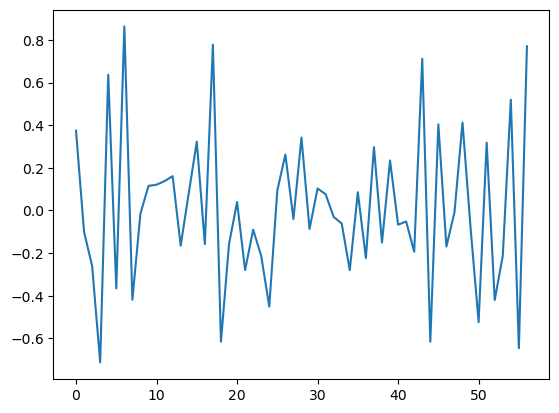

In [81]:
series.plot()

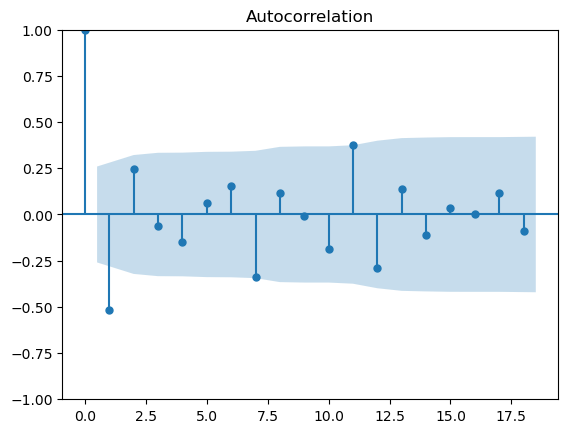

In [82]:
smt.graphics.plot_acf(series, alpha=0.05)
plt.show()

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


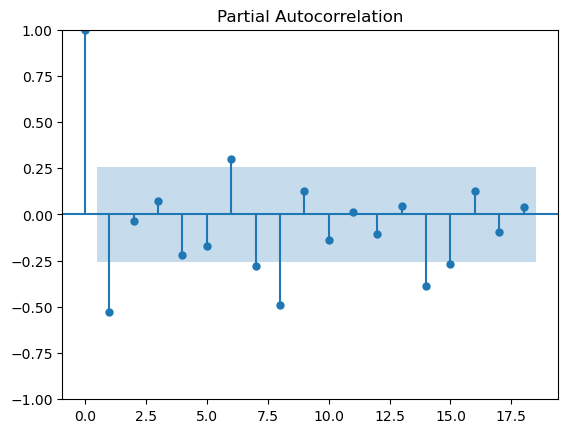

In [83]:
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()

In [84]:
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                 -4.590566
p-value                         0.000134
#Lags Used                      7.000000
Number of Observations Used    49.000000
dtype: float64

### Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда

### Проделаем такие же преобразования для остальных рядов

### robberies_in_boston

In [91]:
series = robberies_in_boston.Count

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


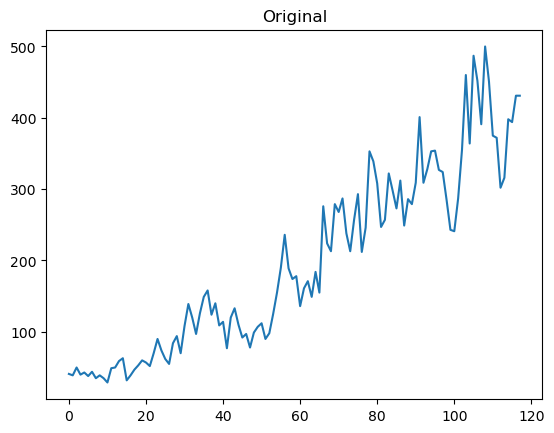

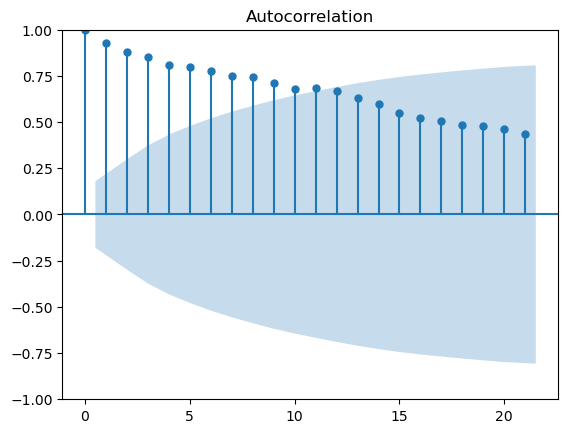

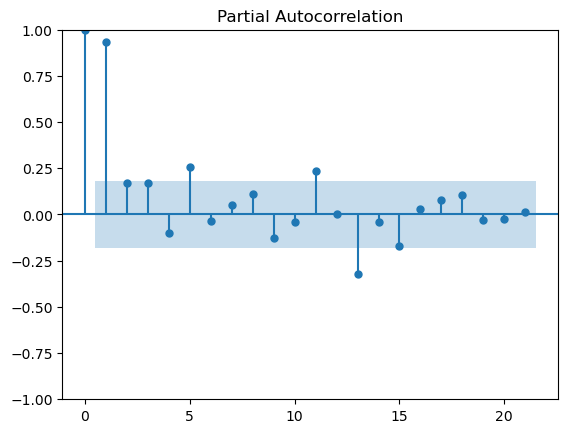

Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
dtype: float64

In [92]:
series.plot()
plt.title("Original")
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

In [93]:
series = boxcox(series, 0) #cтабилизируем дисперсию
series = series[1:] - series[:-1]
series = pd.Series(series)

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


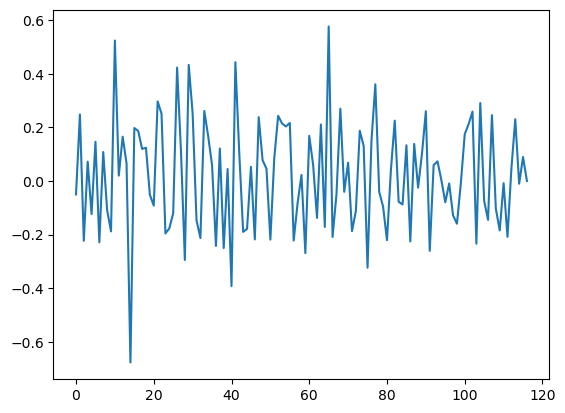

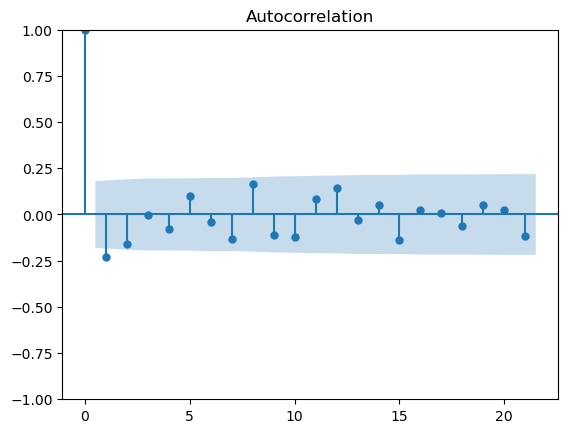

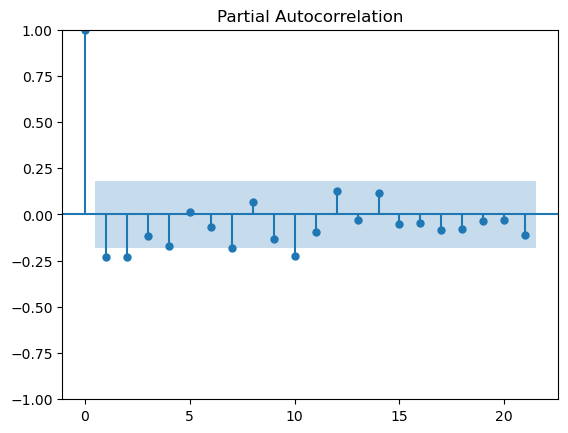

Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
dtype: float64

In [94]:
series.plot()
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

### airlines_passengers

In [105]:
series = airlines_passengers.Count

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


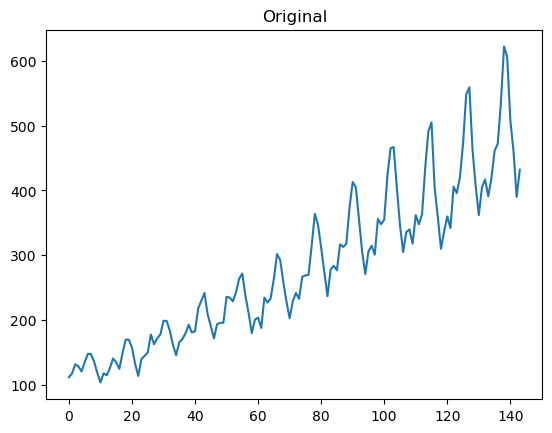

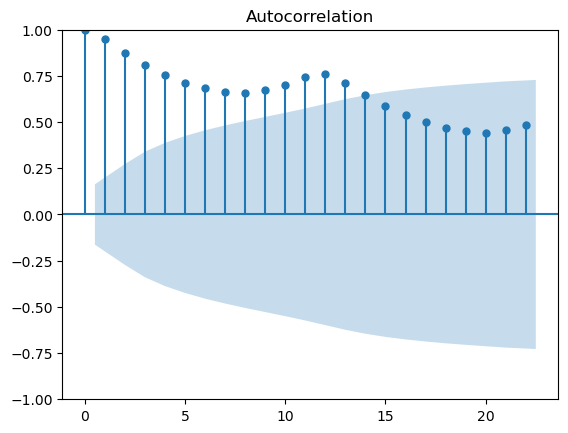

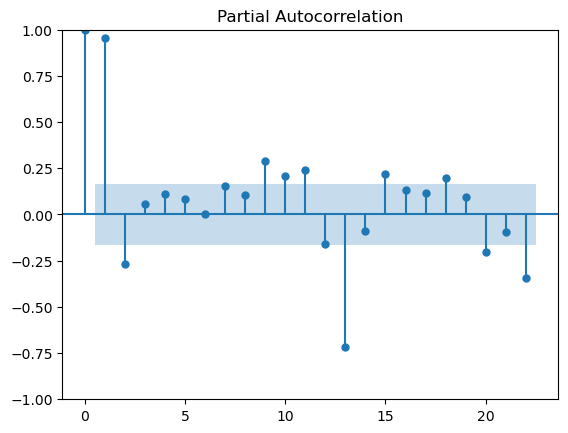

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64

In [96]:
series.plot()
plt.title("Original")
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

In [106]:
series = boxcox(series, 0) #cтабилизируем дисперсию
series = series[1:] - series[:-1]
series = series[7:] - series[:-7]
series = series[12:] - series[:-12]
series = pd.Series(series)

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


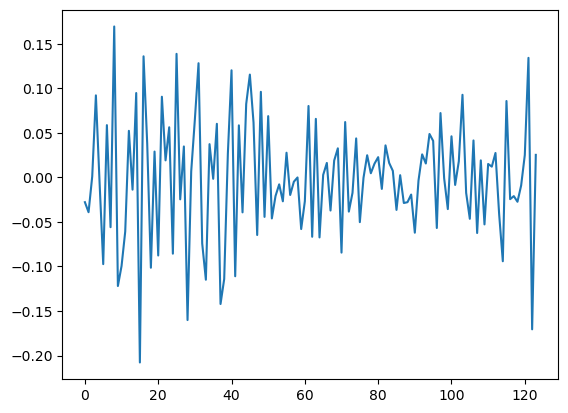

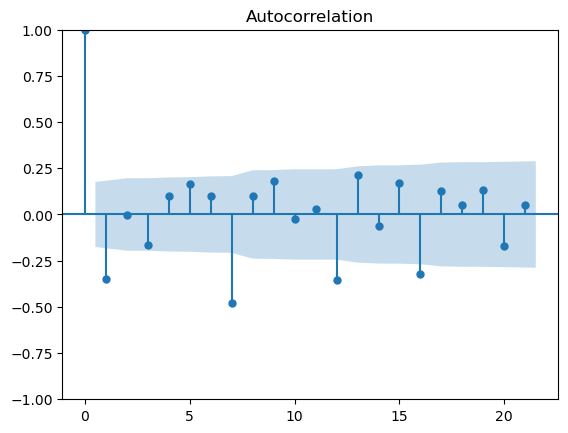

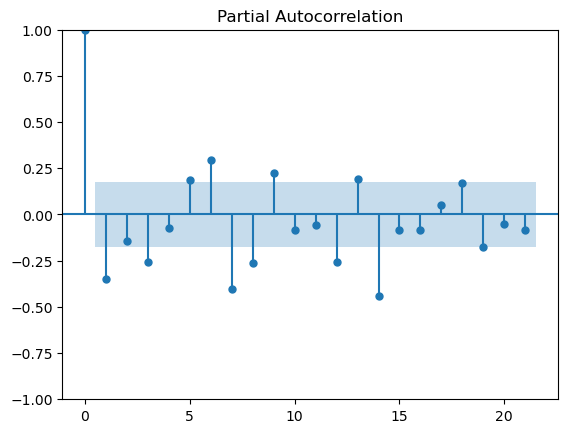

Test Statistic                  -5.332039
p-value                          0.000005
#Lags Used                      13.000000
Number of Observations Used    110.000000
dtype: float64

In [107]:
series.plot()
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

### mean_monthly_temp

In [120]:
series = mean_monthly_temp.Deg

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


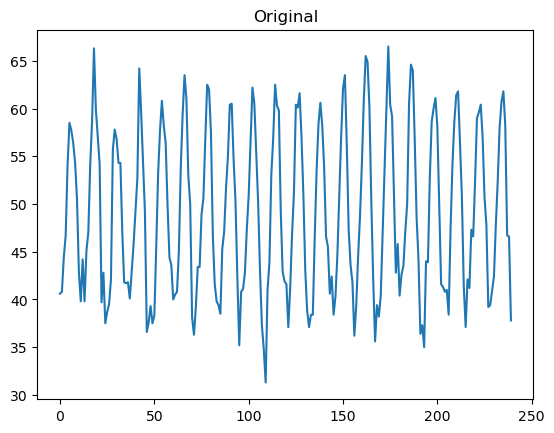

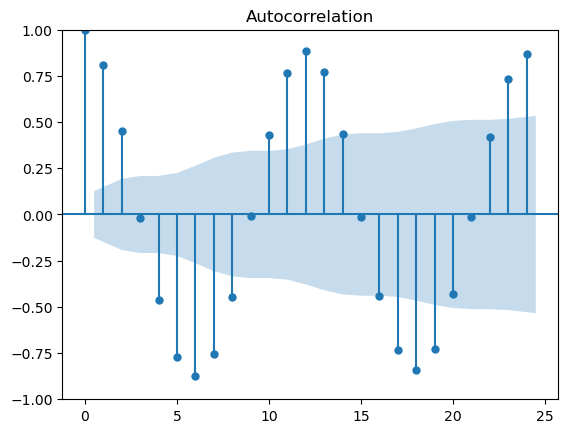

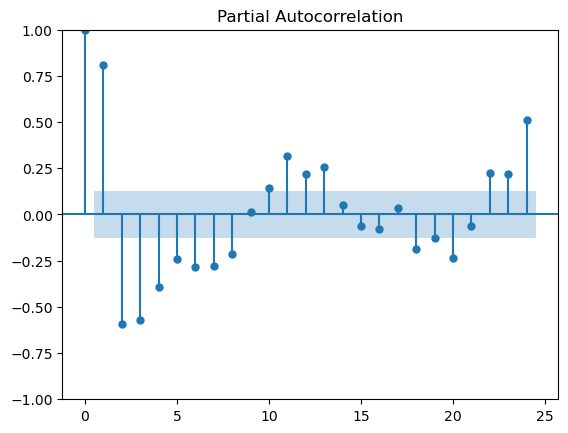

Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
dtype: float64

In [117]:
series.plot()
plt.title("Original")
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

In [122]:
series = series.to_numpy()
series = series[1:] - series[:-1]
series = series[12:] - series[:-12]
series = series[11:] - series[:-11]
series = pd.Series(series)

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


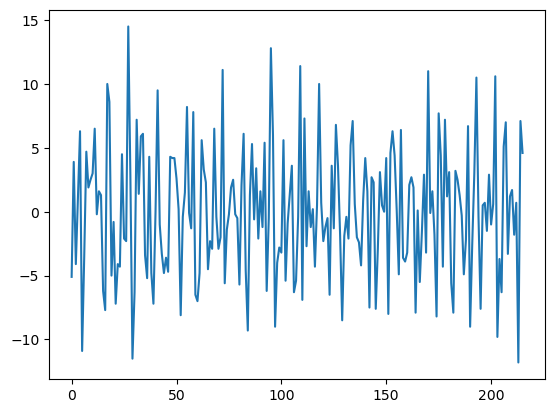

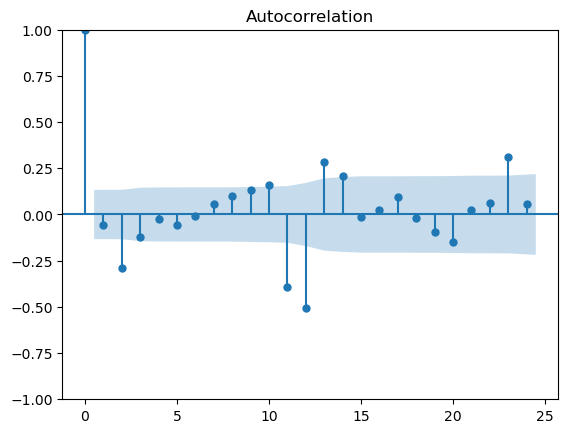

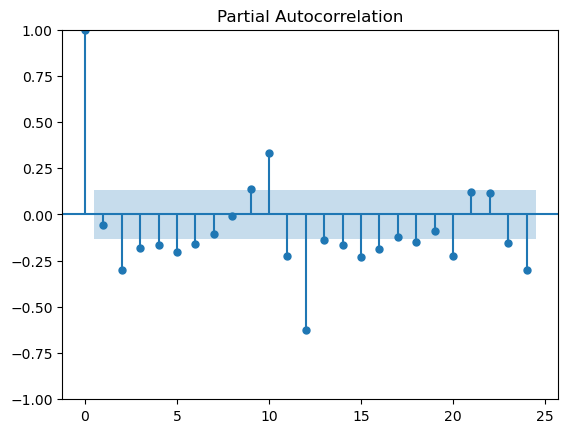

Test Statistic                -8.777230e+00
p-value                        2.430310e-14
#Lags Used                     1.500000e+01
Number of Observations Used    2.000000e+02
dtype: float64

In [123]:
series.plot()
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

### dowjones_closing

In [133]:
series = dowjones_closing.Close

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


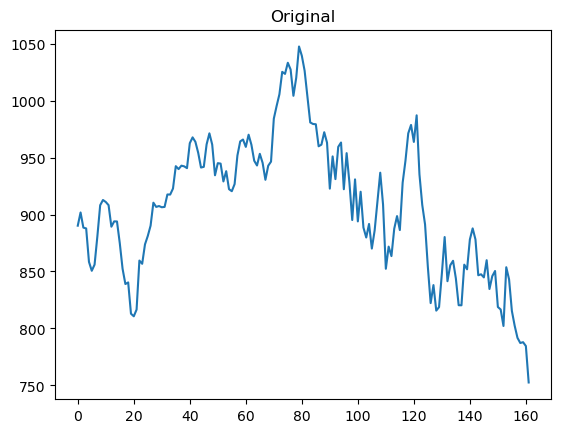

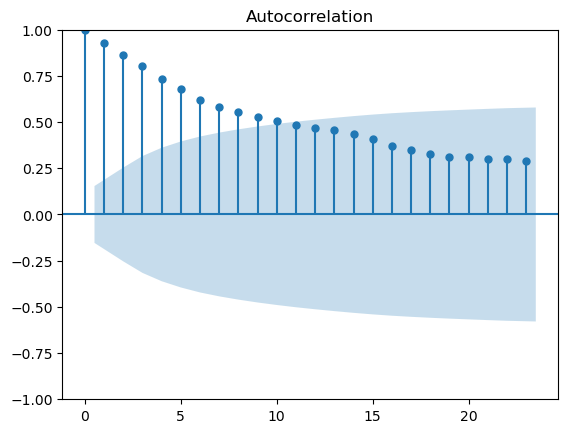

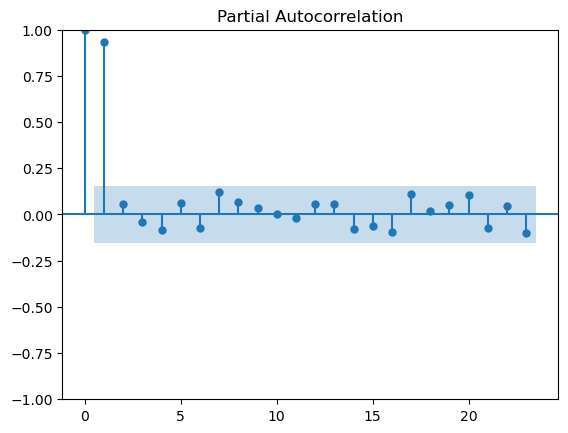

Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
dtype: float64

In [125]:
series.plot()
plt.title("Original")
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

In [134]:
series = boxcox(series, 0) #cтабилизируем дисперсию
series = series[1:] - series[:-1]
series = pd.Series(series)

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


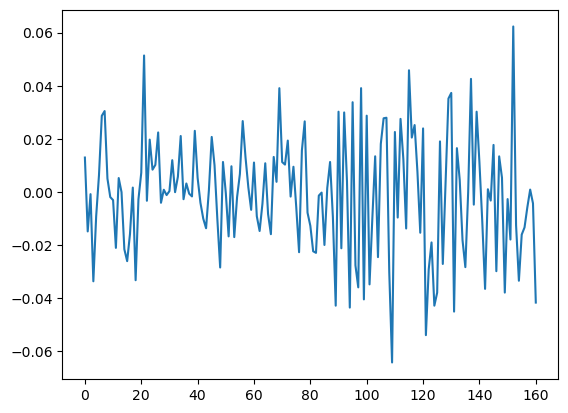

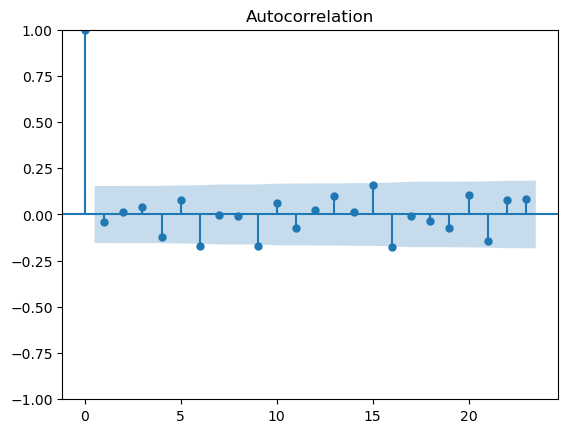

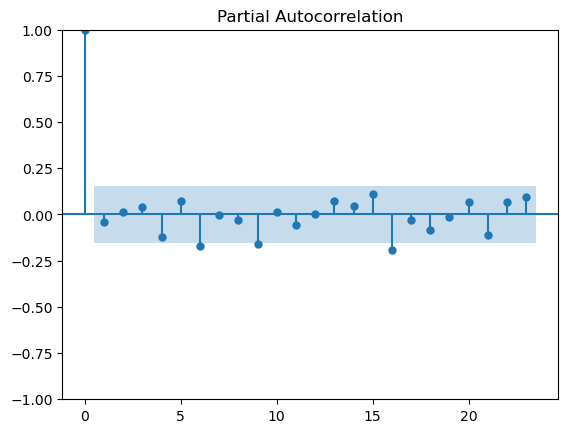

Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
dtype: float64

In [135]:
series.plot()
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

### female_births

In [140]:
series = female_births.Count

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


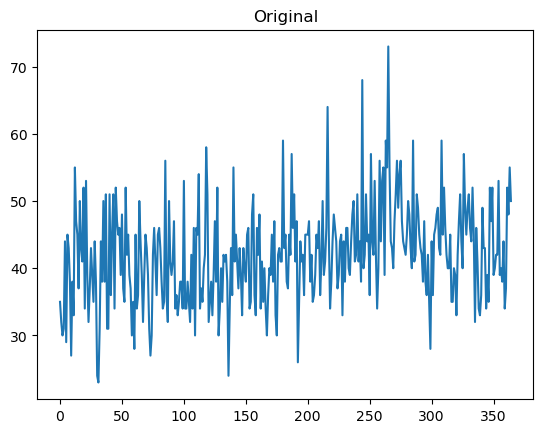

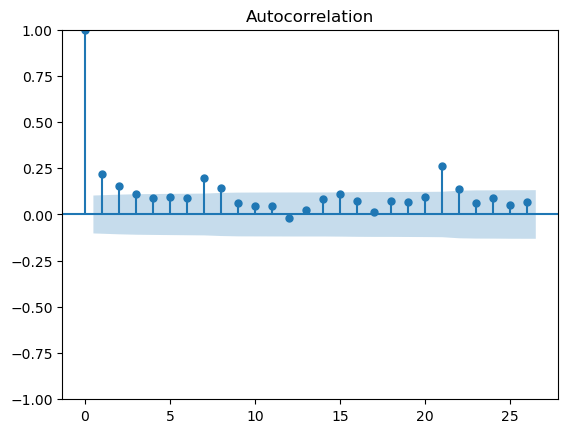

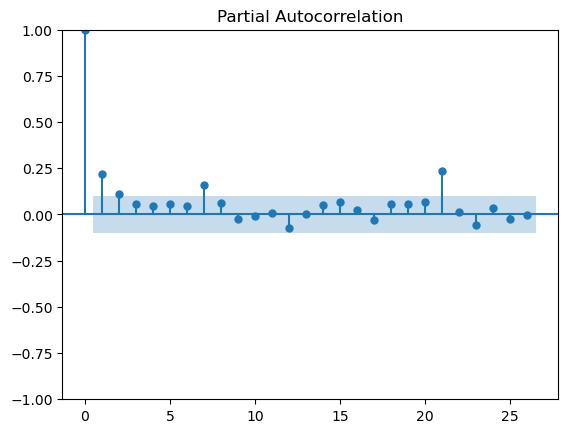

Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
dtype: float64

In [141]:
series.plot()
plt.title("Original")
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

In [142]:
series = boxcox(series, 0) #cтабилизируем дисперсию
series = series[1:] - series[:-1]
series = pd.Series(series)

/Users/marinababanina/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


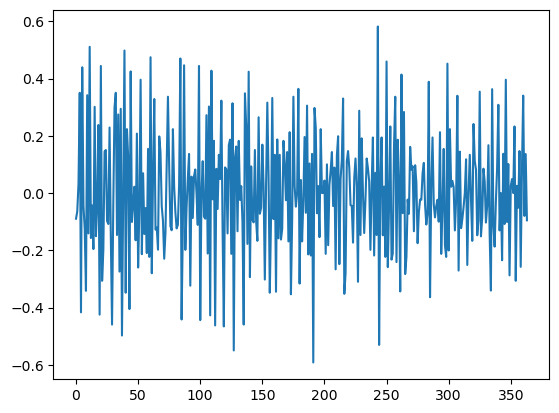

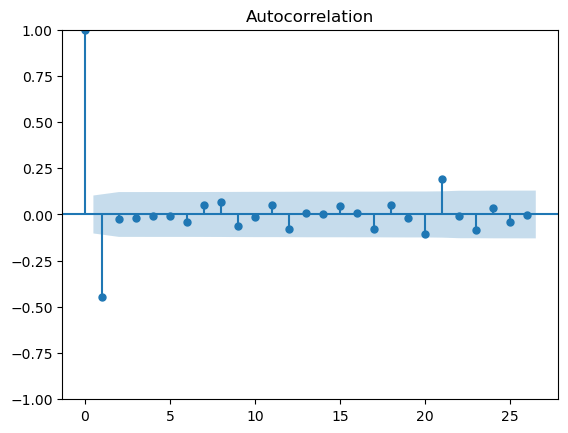

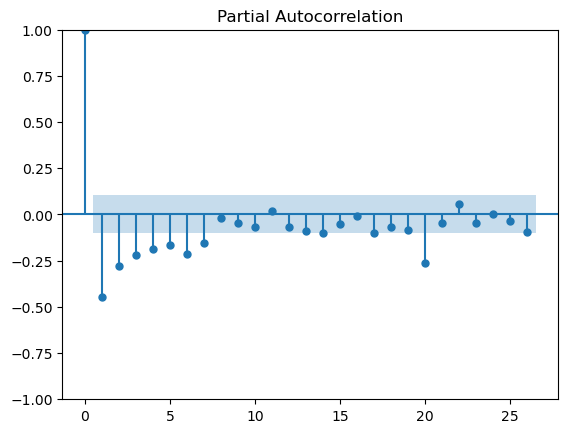

Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
dtype: float64

In [143]:
series.plot()
smt.graphics.plot_acf(series, alpha=0.05)
smt.graphics.plot_pacf(series, alpha=0.05)
plt.show()
dftest = adfuller(series, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])